In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

houseprice = "Input_Files/Median Sales Price of Houses Sold for the United States.xls"
rentocc = "Input_Files/Housing Inventory Estimate Renter Occupied Housing Units in the United States.xls"
rentindex = "Input_Files/CPI_RENT_INDEX.xls"

In [2]:
houseprices = pd.read_excel(houseprice)
rentoccs = pd.read_excel(rentocc)
rentindec = pd.read_excel(rentindex)

In [3]:
houseprices

,observation_date,MSPUS
0,1963-01-01,17800
1,1963-04-01,18000
2,1963-07-01,17900
3,1963-10-01,18500
4,1964-01-01,18500
...,...,...
237,2022-04-01,449300
238,2022-07-01,468000
239,2022-10-01,479500
240,2023-01-01,429000


In [4]:
rentoccs

,observation_date,ERNTOCCUSQ176N
0,2000-04-01,33522
1,2000-07-01,33201
2,2000-10-01,33635
3,2001-01-01,33552
4,2001-04-01,33430
...,...,...
88,2022-04-01,43849
89,2022-07-01,43670
90,2022-10-01,44291
91,2023-01-01,44133


In [5]:
rentindec

,observation_date,CUUR0000SEHA_NBD20000401
0,2000-04-01,100.00000
1,2000-07-01,101.02152
2,2000-10-01,102.24371
3,2001-01-01,103.37468
4,2001-04-01,104.48741
...,...,...
88,2022-04-01,199.92594
89,2022-07-01,204.35972
90,2022-10-01,209.34823
91,2023-01-01,213.86775


In [6]:
rentandhouse = rentoccs.merge(houseprices, on='observation_date', how='left')

In [7]:
rentandhouse

,observation_date,ERNTOCCUSQ176N,MSPUS
0,2000-04-01,33522,163200
1,2000-07-01,33201,168800
2,2000-10-01,33635,172900
3,2001-01-01,33552,169800
4,2001-04-01,33430,179000
...,...,...,...
88,2022-04-01,43849,449300
89,2022-07-01,43670,468000
90,2022-10-01,44291,479500
91,2023-01-01,44133,429000


In [8]:
rentsandhouse = rentandhouse.merge(rentindec, on='observation_date', how='left')

In [9]:
rentsandhouse

,observation_date,ERNTOCCUSQ176N,MSPUS,CUUR0000SEHA_NBD20000401
0,2000-04-01,33522,163200,100.00000
1,2000-07-01,33201,168800,101.02152
2,2000-10-01,33635,172900,102.24371
3,2001-01-01,33552,169800,103.37468
4,2001-04-01,33430,179000,104.48741
...,...,...,...,...
88,2022-04-01,43849,449300,199.92594
89,2022-07-01,43670,468000,204.35972
90,2022-10-01,44291,479500,209.34823
91,2023-01-01,44133,429000,213.86775


In [10]:
rentsandhouse.rename(columns = {'ERNTOCCUSQ176N' : 'rental_occupancy', 'MSPUS' : 'median_house_sale', 'CUUR0000SEHA_NBD20000401' : 'qrt_rent_ind'} , inplace = True)

In [11]:
rentsandhouse.info()
rentsandhouse.to_csv("Input_Files/LPhouseandrent.csv", index_label="")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   observation_date   93 non-null     datetime64[ns]
 1   rental_occupancy   93 non-null     int64         
 2   median_house_sale  93 non-null     int64         
 3   qrt_rent_ind       93 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.6 KB


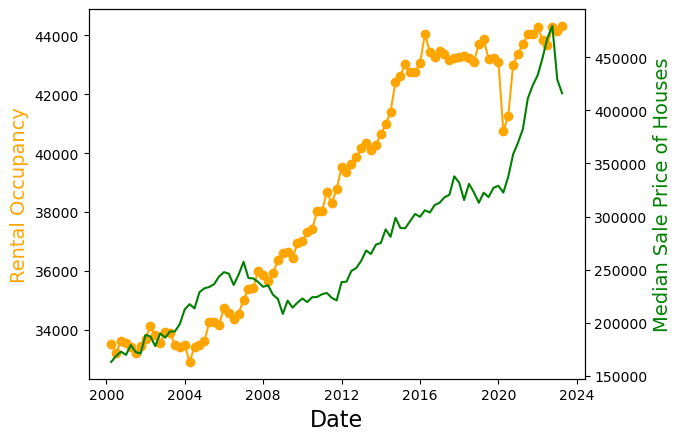

<Figure size 640x480 with 0 Axes>

In [12]:
fig,ax = plt.subplots()
ax.plot(rentsandhouse["observation_date"], rentsandhouse["rental_occupancy"], color="orange", marker="o")
ax.set_xlabel("Date", fontsize = 16)
ax.set_ylabel("Rental Occupancy", color="orange", fontsize = 14)
ax2 = ax.twinx()
ax2.plot(rentsandhouse["observation_date"], rentsandhouse["median_house_sale"], color="green")
ax2.set_ylabel("Median Sale Price of Houses", color="green", fontsize = 14)
#plt.plot(rentsandhouse["observation_date"], oh_fit, "--")
plt.show()
plt.savefig("output_data/RentoccVshouse.png")

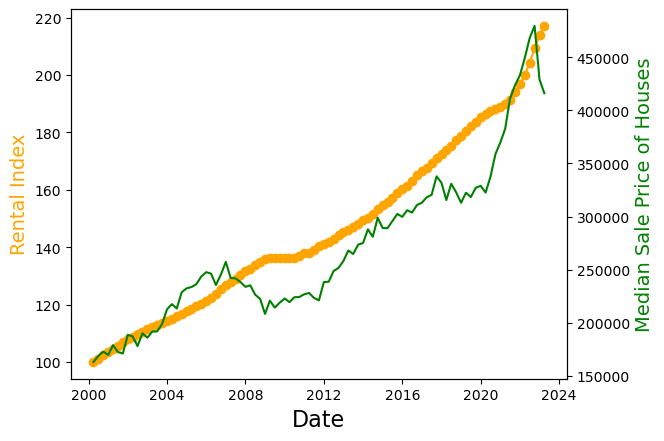

<Figure size 640x480 with 0 Axes>

In [13]:
fig,ax = plt.subplots()
ax.plot(rentsandhouse["observation_date"], rentsandhouse["qrt_rent_ind"], color="orange", marker="o")
ax.set_xlabel("Date", fontsize = 16)
ax.set_ylabel("Rental Index", color="orange", fontsize = 14)
ax2 = ax.twinx()
ax2.plot(rentsandhouse["observation_date"], rentsandhouse["median_house_sale"], color="green")
ax2.set_ylabel("Median Sale Price of Houses", color="green", fontsize = 14)
plt.show()
plt.savefig("output_data/RentIndVshouse.png")